<div style="text-align: center; margin-bottom: 30px;">
  <h1 style="color: #2E86C1; font-size: 3em; font-weight: bold; margin-bottom: 10px;text-align: center;">
    Heart Attack EDA and Detection
  </h1>
  <p style="color: #5D6D7E; font-size: 1.2em; margin-top: 0;text-align: center;">
    A Comprehensive Analysis and Detection of Heart Attack in youth vs Adult in Russia Dataset
  </p>
</div>
<div style="text-align: center; color: #5D6D7E; font-size: 1.2em; margin-top: 10px;">
  <strong>Author:</strong> Ahmed Saqr<br>
  <strong>Date:</strong> Jan 2025<br>
  <strong>GitHub:</strong> <a href="https://github.com/ahmedhassan456" style="color: #3498DB;">Click Here</a>
</div>

<div style="padding: 15px; border-radius: 5px; margin-top: 10px;">
  <p style="color: #5D6D7E; font-size: 1.1em;">
    This dataset is a synthetically generated collection of data pertaining to . It comprises 50,000 rows and 30 columns, designed to mimic real-world data while ensuring privacy and ethical considerations are upheld.
  </p>

  <h3 style="color: #2E86C1; font-size: 1.5em; margin-top: 20px;">Dataset Details</h3>
  <ul style="color: #5D6D7E; font-size: 1em;">
    <strong>Synthetic:</strong> The data is not derived from actual individuals or events, but rather created through algorithms that replicate statistical patterns and relationships observed in real-world Nigerian data.<br>
<strong>Large Scale:</strong> With 50,000 rows, the dataset offers a substantial volume for training and evaluating machine learning models, conducting statistical analyses, and exploring various research questions.<br>
<strong>Multifaceted:</strong> The 30 columns suggest the inclusion of diverse variables, potentially encompassing demographic, socioeconomic, health, financial, or other relevant domains.
  </ul>
</div>

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Import Necessary libraries
</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.under_sampling import ClusterCentroids
import optuna
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Load the Data
</h2>

In [2]:
df = pd.read_csv("data/heart_attack_russia_youth_vs_adult.csv")

In [3]:
df.head()

,ID,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,...,Income_Level,Physical_Activity,Education_Level,Marital_Status,Urban_Rural,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,1,50,Male,Rural,110.0,196.5,15.9,76,High,False,...,Low,Low,Primary,Married,Rural,False,5,2.3,5,False
1,2,40,Female,Urban,138.8,157.5,27.1,82,Moderate,False,...,Low,Moderate,Higher,Married,Urban,False,1,5.0,4,False
2,3,26,Male,Rural,116.0,210.1,27.2,71,Moderate,False,...,Middle,High,Primary,Married,Urban,False,4,2.4,8,False
3,4,54,Female,Rural,133.5,170.5,26.0,74,Moderate,True,...,Middle,Moderate,Higher,Married,Urban,False,2,2.7,6,True
4,5,19,Female,Urban,108.0,224.5,27.5,67,Low,False,...,Middle,Low,Higher,Widowed,Urban,False,4,3.5,4,True


<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Check of Data
</h2>

In [4]:
print('Number of Columns:', df.shape[1])
print('Number of Rowa:', df.shape[0])

Number of Columns: 30
Number of Rowa: 50000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  int64  
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Region                 50000 non-null  object 
 4   Blood_Pressure         50000 non-null  float64
 5   Cholesterol            50000 non-null  float64
 6   BMI                    50000 non-null  float64
 7   Heart_Rate             50000 non-null  int64  
 8   Exercise_Level         50000 non-null  object 
 9   Smoking                50000 non-null  bool   
 10  Alcohol_Consumption    24976 non-null  object 
 11  Diabetes               50000 non-null  bool   
 12  Family_History         50000 non-null  bool   
 13  Stress_Level           50000 non-null  int64  
 14  Heart_Attack           50000 non-null  bool   
 15  An

In [6]:
df.isna().sum()

ID                           0
Age                          0
Gender                       0
Region                       0
Blood_Pressure               0
Cholesterol                  0
BMI                          0
Heart_Rate                   0
Exercise_Level               0
Smoking                      0
Alcohol_Consumption      25024
Diabetes                     0
Family_History               0
Stress_Level                 0
Heart_Attack                 0
Angina                       0
Heart_Disease_History        0
Diet                         0
Sleep_Hours                  0
Occupation                   0
Income_Level                 0
Physical_Activity            0
Education_Level              0
Marital_Status               0
Urban_Rural                  0
Medication                   0
Health_Awareness             0
Daily_Water_Intake           0
Mental_Health                0
Obesity                      0
dtype: int64

In [7]:
print('Number of Duplicties:', df.duplicated().sum())

Number of Duplicties: 0


In [8]:
for i in df.select_dtypes(include='object').columns:
    print(df[i].value_counts())
    print('****'*20)

Gender
Female    24155
Male      23944
Other      1901
Name: count, dtype: int64
********************************************************************************
Region
Urban       25034
Rural       14946
Suburban    10020
Name: count, dtype: int64
********************************************************************************
Exercise_Level
Moderate    24946
Low         15100
High         9954
Name: count, dtype: int64
********************************************************************************
Alcohol_Consumption
Moderate    20022
Heavy        4954
Name: count, dtype: int64
********************************************************************************
Diet
Healthy      19789
Mixed        15185
Unhealthy    15026
Name: count, dtype: int64
********************************************************************************
Occupation
Employed      25166
Student       10068
Unemployed     9843
Retired        4923
Name: count, dtype: int64
*********************************************

In [9]:
# there are only 2 genders
df = df[df['Gender'].isin(['Female', 'Male'])]

In [10]:
df.drop(['ID', 'Alcohol_Consumption', 'Urban_Rural'], inplace=True, axis=1)

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    EDA
</h2>

In [11]:
numerical_summary = df.describe().transpose()

palette = sns.color_palette('viridis', as_cmap=True)

numerical_summary.style.background_gradient(cmap=palette)

,count,mean,std,min,25%,50%,75%,max
Age,48099.000000,36.006383,14.107108,12.000000,24.000000,36.000000,48.000000,60.000000
Blood_Pressure,48099.000000,120.067134,14.961710,60.000000,109.900000,120.100000,130.100000,188.400000
Cholesterol,48099.000000,199.875496,49.961002,-18.700000,166.200000,199.800000,233.600000,398.800000
BMI,48099.000000,24.985415,5.001427,2.900000,21.600000,25.000000,28.300000,46.100000
Heart_Rate,48099.000000,79.980873,11.802048,60.000000,70.000000,80.000000,90.000000,100.000000
Stress_Level,48099.000000,5.503524,2.870933,1.000000,3.000000,6.000000,8.000000,10.000000
Sleep_Hours,48099.000000,7.014406,1.740997,4.000000,5.500000,7.000000,8.500000,10.000000
Health_Awareness,48099.000000,3.006715,1.410761,1.000000,2.000000,3.000000,4.000000,5.000000
Daily_Water_Intake,48099.000000,2.996694,1.149069,1.000000,2.000000,3.000000,4.000000,5.000000
Mental_Health,48099.000000,5.483960,2.858036,1.000000,3.000000,5.000000,8.000000,10.000000


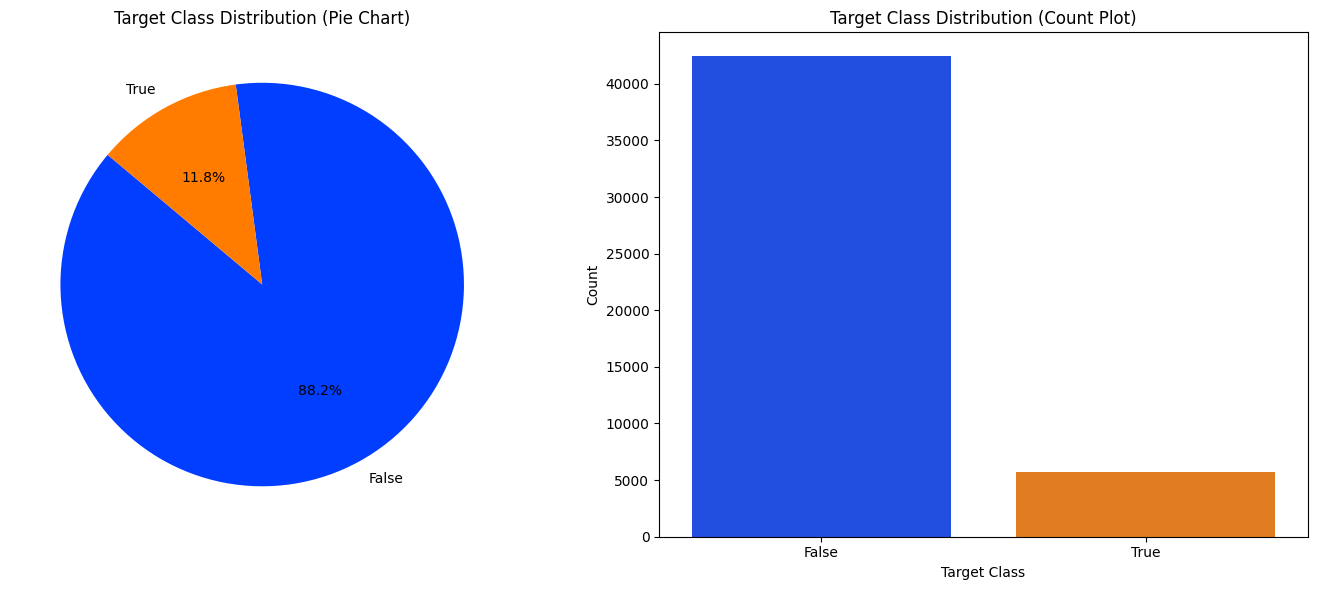

In [12]:
target_counts = df['Heart_Attack'].value_counts().sort_index()

palette = sns.color_palette('bright', n_colors=len(target_counts))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
ax1.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
ax1.set_title('Target Class Distribution (Pie Chart)')
sns.countplot(x="Heart_Attack", data=df, ax=ax2, order=target_counts.index, palette=palette)
ax2.set_title('Target Class Distribution (Count Plot)')
ax2.set_xlabel('Target Class')
ax2.set_ylabel('Count')
plt.tight_layout()
plt.show()

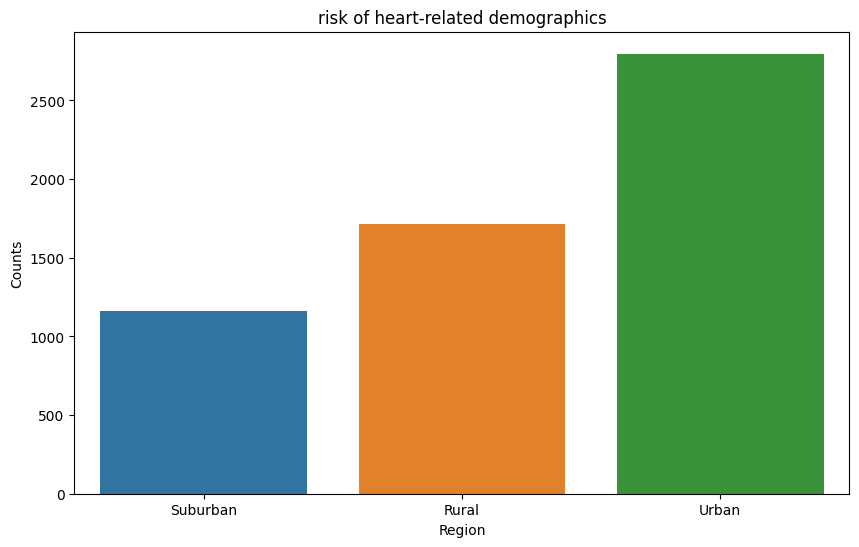

In [13]:
segment_by_demographics = df.groupby('Region')['Heart_Attack'].sum().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=segment_by_demographics.index, y=segment_by_demographics.values)
plt.title('risk of heart-related demographics')
plt.xlabel('Region')
plt.ylabel('Counts')
plt.show()

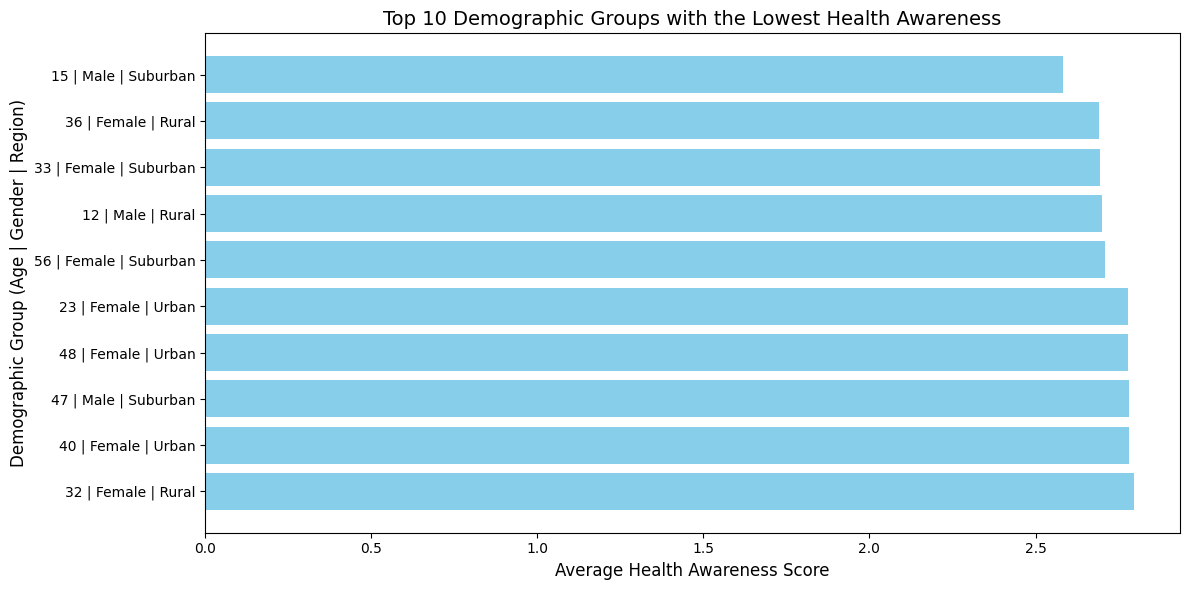

In [14]:
grouped_data = df.groupby(['Age', 'Gender', 'Region'])['Health_Awareness'].mean().reset_index()
low_awareness_groups = grouped_data.sort_values(by='Health_Awareness', ascending=True)

plt.figure(figsize=(12, 6))
plt.barh(
    low_awareness_groups.apply(lambda x: f"{x['Age']} | {x['Gender']} | {x['Region']}", axis=1).head(10),
    low_awareness_groups['Health_Awareness'].head(10),
    color='skyblue'
)
plt.xlabel('Average Health Awareness Score', fontsize=12)
plt.ylabel('Demographic Group (Age | Gender | Region)', fontsize=12)
plt.title('Top 10 Demographic Groups with the Lowest Health Awareness', fontsize=14)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [15]:
grouped_data = df.groupby(['Cholesterol', 'Diabetes', 'Stress_Level', 'Family_History'])['Heart_Attack'].mean().reset_index()
key_risk_factors = grouped_data.sort_values('Heart_Attack', ascending=False)

print("Top 10 key risk factors contributing to heart attacks")
key_risk_factors.reset_index().head(10)

Top 10 key risk factors contributing to heart attacks


,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,13387,189.1,True,6,False,1.0
1,24944,248.4,False,8,False,1.0
2,2687,123.2,True,6,False,1.0
3,11679,181.0,False,3,True,1.0
4,18757,214.8,False,7,True,1.0
5,15065,197.2,False,3,False,1.0
6,28917,280.3,False,9,False,1.0
7,7408,158.2,True,5,False,1.0
8,28914,280.3,False,6,False,1.0
9,24940,248.4,False,5,True,1.0


In [16]:
low_risk_factors = grouped_data.sort_values('Heart_Attack', ascending=True)
print("Top 10 low risk factors contributing to heart attacks")
low_risk_factors.reset_index().head(10)

Top 10 low risk factors contributing to heart attacks


,index,Cholesterol,Diabetes,Stress_Level,Family_History,Heart_Attack
0,0,-18.7,False,1,False,0.0
1,20082,221.3,True,3,True,0.0
2,20081,221.3,False,10,False,0.0
3,20080,221.3,False,9,True,0.0
4,20079,221.3,False,9,False,0.0
5,20078,221.3,False,8,False,0.0
6,20076,221.3,False,7,False,0.0
7,20075,221.3,False,6,True,0.0
8,20073,221.3,False,4,True,0.0
9,20072,221.3,False,3,True,0.0


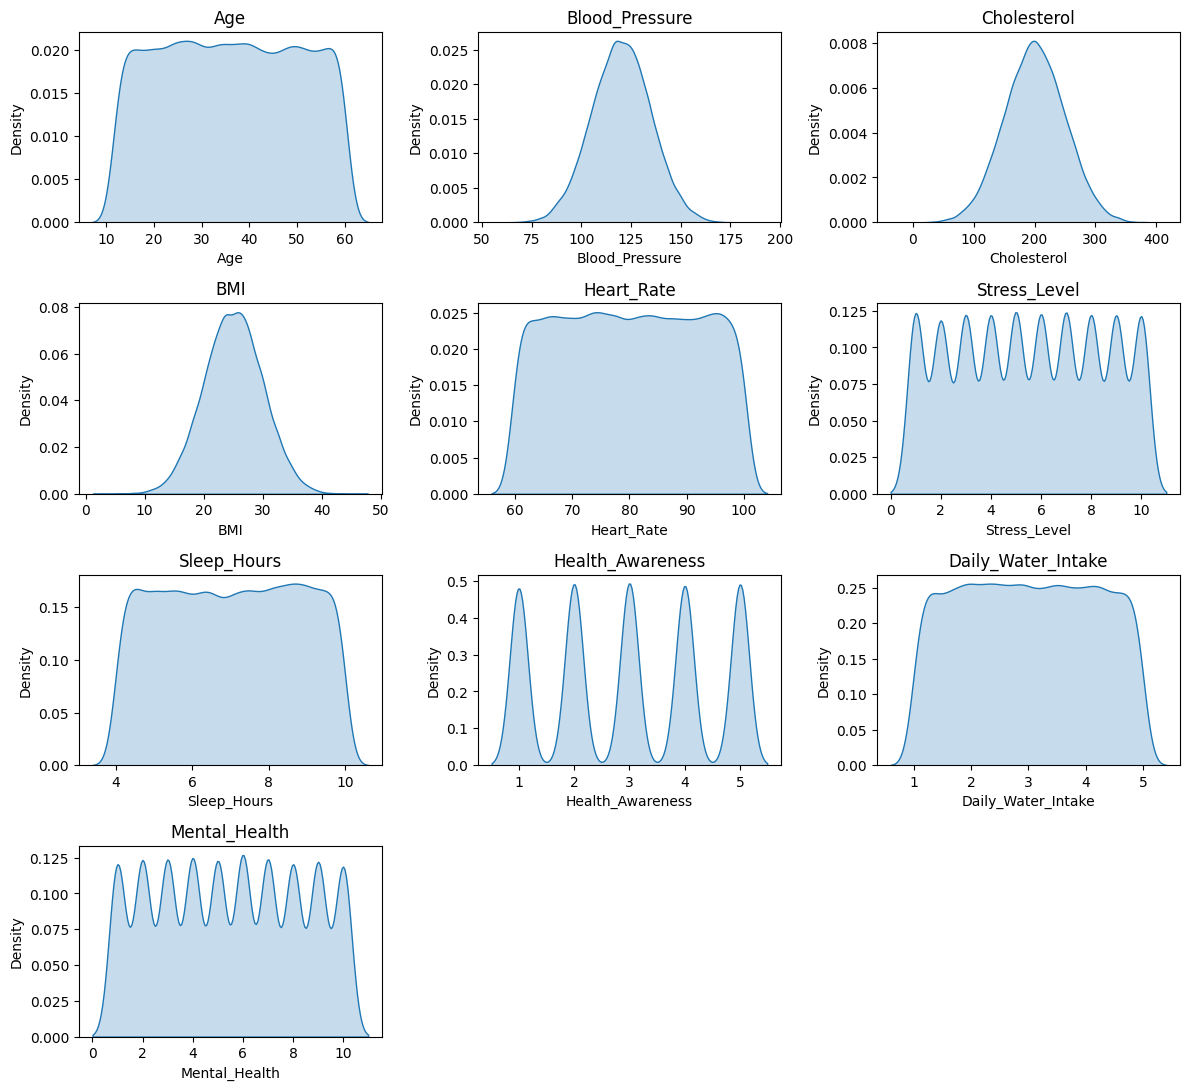

In [17]:
plt.figure(figsize=(12, 16))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(data=df, x=feature, fill=True)
    plt.title(f"{feature}")
plt.tight_layout()
plt.show()

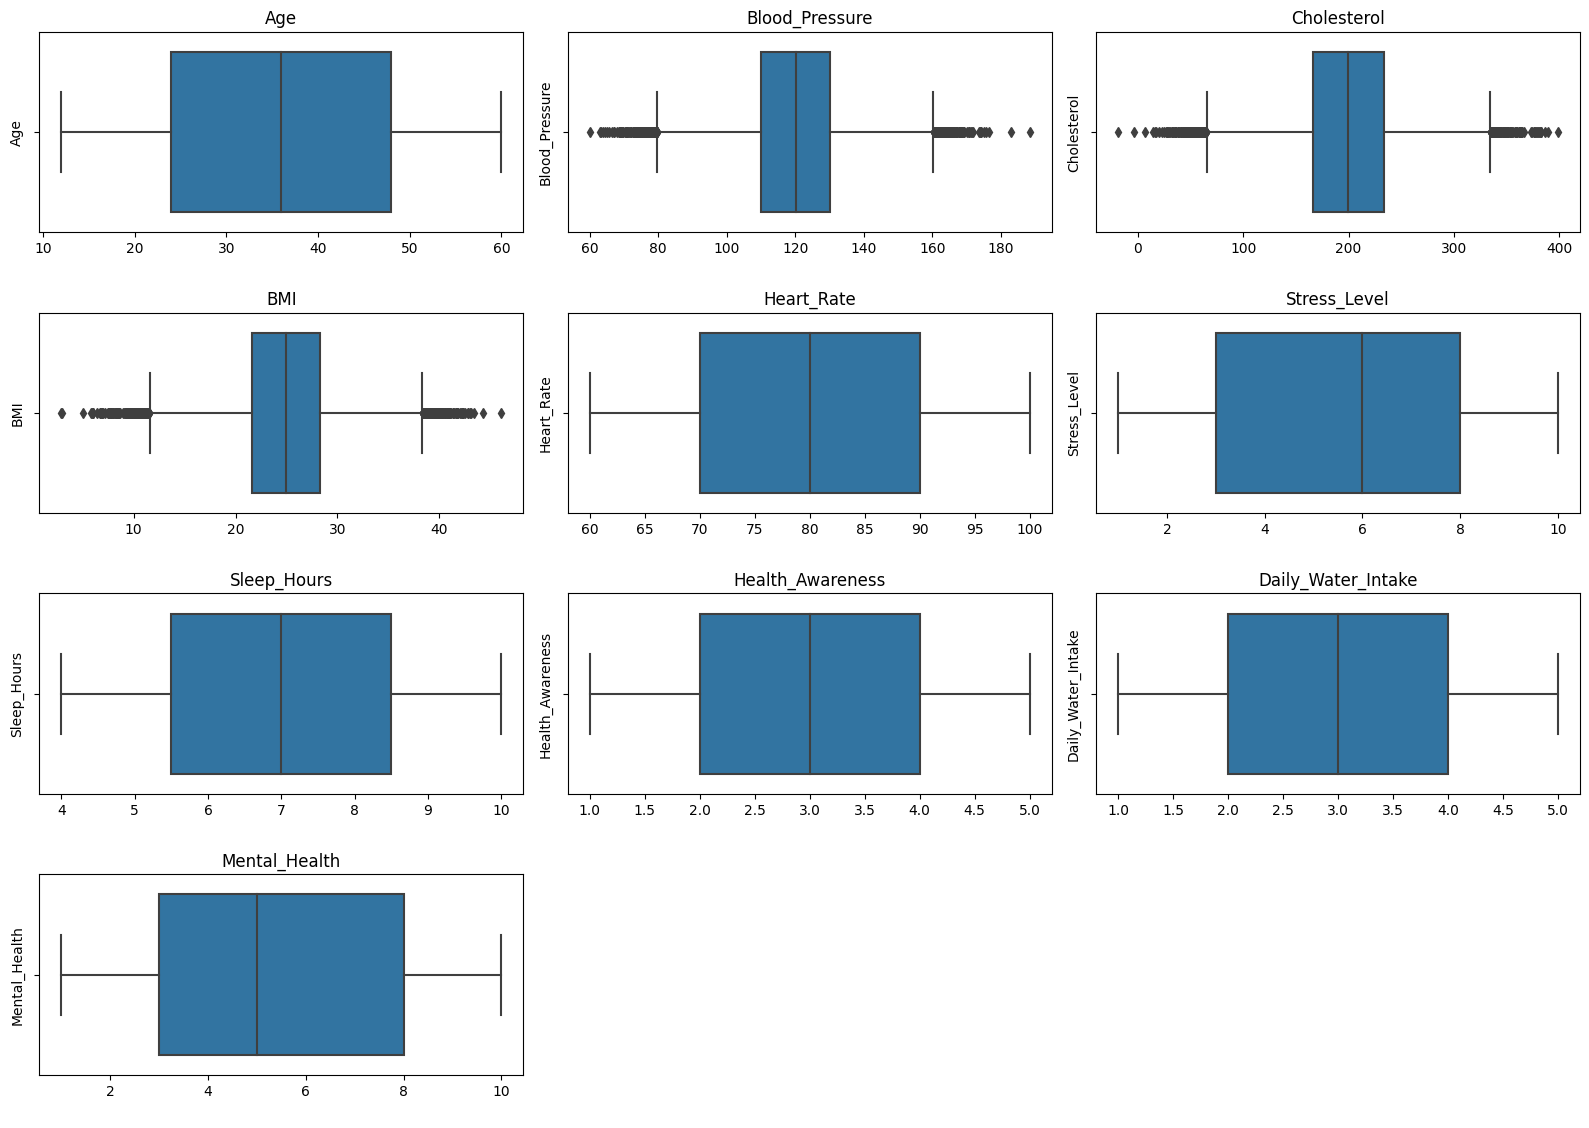

In [18]:
plt.figure(figsize=(16, 25))
for i, feature in enumerate(df.select_dtypes(include="number").columns):
    plt.subplot(9, 3, i+1)
    sns.boxplot(data=df, x=feature)
    plt.title(f"{feature}")
    plt.xlabel(' ')
    plt.ylabel(f"{feature}")
plt.tight_layout()
plt.show()

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Outliers Treatment
</h2>

In [19]:
for i in ["Blood_Pressure", "Cholesterol", "BMI"]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    
    df = df.loc[(df[i] < upper_limit) & (df[i] > lower_limit)]

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Encoding
</h2>

In [20]:
# encoder = LabelEncoder()
# for i in df.select_dtypes(include="object").columns:
#     df[i] = encoder.fit_transform(df[i])

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Region'] = df['Region'].map({'Urban': 0, 'Rural': 1, 'Suburban': 0.5})
df['Exercise_Level'] = df['Exercise_Level'].map({'Low': 0, 'High': 1, 'Moderate': 0.5})
df['Diet'] = df['Diet'].map({'Unhealthy': 0, 'Healthy': 1, 'Mixed': 0.5})
df['Occupation'] = df['Occupation'].map({'Unemployed': 0, 'Employed': 2, 'Student': 1, 'Retired': 3})
df['Income_Level'] = df['Income_Level'].map({'Low': 0, 'High': 1, 'Middle': 0.5})
df['Physical_Activity'] = df['Physical_Activity'].map({'Low': 0, 'High': 1, 'Moderate': 0.5})
df['Education_Level'] = df['Education_Level'].map({'Primary': 0, 'Higher': 2, 'Secondary': 1})
df['Marital_Status'] = df['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3})

for i in df.select_dtypes(include="bool").columns:
    df[i] = df[i].map({True: 1, False: 0})

In [21]:
df.head()

,Age,Gender,Region,Blood_Pressure,Cholesterol,BMI,Heart_Rate,Exercise_Level,Smoking,Diabetes,...,Occupation,Income_Level,Physical_Activity,Education_Level,Marital_Status,Medication,Health_Awareness,Daily_Water_Intake,Mental_Health,Obesity
0,50,1,1.0,110.0,196.5,15.9,76,1.0,0,0,...,0,0.0,0.0,0,1,0,5,2.3,5,0
1,40,0,0.0,138.8,157.5,27.1,82,0.5,0,0,...,2,0.0,0.5,2,1,0,1,5.0,4,0
2,26,1,1.0,116.0,210.1,27.2,71,0.5,0,1,...,2,0.5,1.0,0,1,0,4,2.4,8,0
3,54,0,1.0,133.5,170.5,26.0,74,0.5,1,0,...,1,0.5,0.5,2,1,0,2,2.7,6,1
4,19,0,0.0,108.0,224.5,27.5,67,0.0,0,0,...,2,0.5,0.0,2,3,0,4,3.5,4,1


<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Correlation between the Data
</h2>

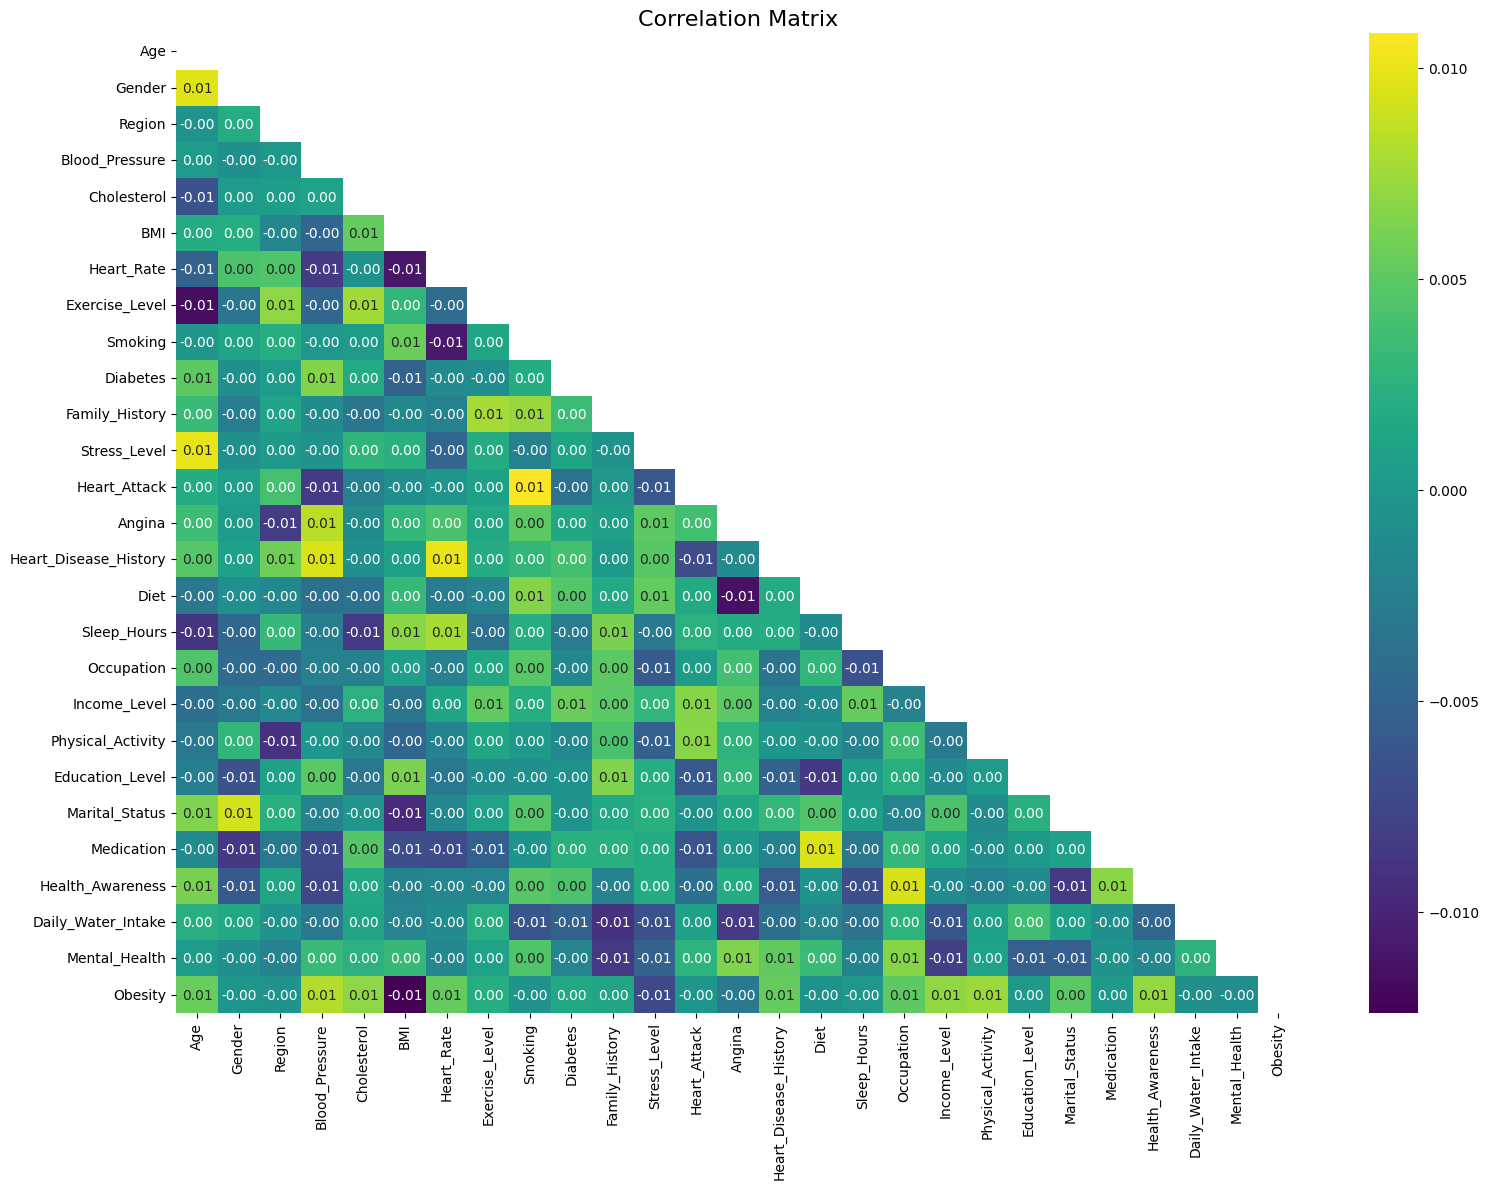

In [22]:
corr = df.corr()
mask_ut = np.triu(np.ones(corr.shape)).astype(np.bool_)

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis", mask=mask_ut)
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

## General Observations:
### Low Correlations Across Most Features:
The majority of the features have very low or near-zero correlations with each other, indicating minimal linear relationships between them.

### Health-Related Features:

- Heart Attack and Angina: There seems to be a noticeable correlation between `Heart_Attack` and `Angina`. This is expected, as both conditions are linked to cardiovascular health.
- Heart Rate and Exercise Level: A moderate correlation may exist, suggesting a link between physical activity and heart rate.
- Obesity and BMI: Likely strong correlation (not visible here), as BMI is a primary indicator of obesity.


### Lifestyle Factors:

- Smoking and Stress Level: If there is a positive correlation, it could imply that smoking is linked to higher stress levels.
- Exercise Level and Physical Activity: These features are likely positively correlated, reflecting how they complement each other in assessing an active lifestyle.


### Daily Water Intake and Mental Health:
If a relationship exists, it could reveal the role of hydration in maintaining mental health.


### Demographics and Health Outcomes:

- **Age**: Age may show some correlation with chronic conditions like `Heart_Disease_History` or `Diabetes`, as these are often age-related.
- **Income_Level and Health_Awareness**: A possible positive correlation might exist, indicating that higher income groups are more aware of health-related issues.

### Cholesterol and Blood Pressure:
A potential positive correlation between these features may indicate the interconnectedness of cardiovascular risk factors.

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Handling Imbalanced Data
</h2>

In [23]:
x = df.drop("Heart_Attack", axis=1)
y = df["Heart_Attack"]

In [24]:
cc = ClusterCentroids(random_state=42)
x_resampled, y_resampled = cc.fit_resample(x, y)

In [25]:
x_resampled.shape, y_resampled.shape

((11112, 26), (11112,))

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Splitting the Data
</h2>

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, random_state=42, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8889, 26), (2223, 26), (8889,), (2223,))

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Model Building
</h2>

In [27]:
def objective_xgb(trial):
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 1e-1, log=True),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'alpha': trial.suggest_float('alpha', 1e-3, 1e-1, log=True),
        'lambda': trial.suggest_float('lambda', 1e-3, 1e-1, log=True),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    
    model = XGBClassifier(**param)
    
    model.fit(x_train, y_train, eval_set=[(x_test, y_test)], early_stopping_rounds=50, verbose=False)
    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

print("Best XGB Params:", study_xgb.best_params)
print("Best XGB Accuracy:", study_xgb.best_value)

[I 2025-01-21 20:05:47,867] A new study created in memory with name: no-name-2a408b56-d45b-46ff-bf4b-fa544045bab1
[I 2025-01-21 20:05:48,334] Trial 0 finished with value: 0.9271255060728745 and parameters: {'n_estimators': 239, 'max_depth': 3, 'learning_rate': 0.002136100726092613, 'colsample_bytree': 0.8101444122374781, 'subsample': 0.8639284805743046, 'alpha': 0.045145924804255576, 'lambda': 0.049474478051219}. Best is trial 0 with value: 0.9271255060728745.
[I 2025-01-21 20:05:49,026] Trial 1 finished with value: 0.9847053531264057 and parameters: {'n_estimators': 216, 'max_depth': 8, 'learning_rate': 0.003095164087136405, 'colsample_bytree': 0.530508801603011, 'subsample': 0.7690908196432626, 'alpha': 0.0027813095536370065, 'lambda': 0.001073693057555937}. Best is trial 1 with value: 0.9847053531264057.
[I 2025-01-21 20:05:49,456] Trial 2 finished with value: 0.9923526765632029 and parameters: {'n_estimators': 925, 'max_depth': 5, 'learning_rate': 0.09281075342227273, 'colsample_by

Best XGB Params: {'n_estimators': 722, 'max_depth': 4, 'learning_rate': 0.023801613177186168, 'colsample_bytree': 0.636133709347434, 'subsample': 0.8911878547983614, 'alpha': 0.07557209794916242, 'lambda': 0.034614548612140125}
Best XGB Accuracy: 0.9932523616734144


In [28]:
final_model = XGBClassifier(**study_xgb.best_params, random_state=42, use_label_encoder=False,
                            eval_metric='logloss')
final_model.fit(x_train, y_train)

XGBClassifier(alpha=0.07557209794916242, base_score=None, booster=None,
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.636133709347434, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.034614548612140125,
              learning_rate=0.023801613177186168, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=722, n_jobs=None, ...)

In [29]:
preds = final_model.predict(x_test)

In [30]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1119
           1       0.99      1.00      0.99      1104

    accuracy                           0.99      2223
   macro avg       0.99      0.99      0.99      2223
weighted avg       0.99      0.99      0.99      2223



In [31]:
print(f"the Acc Score: {accuracy_score(y_test, preds) * 100}")

the Acc Score: 99.32523616734143


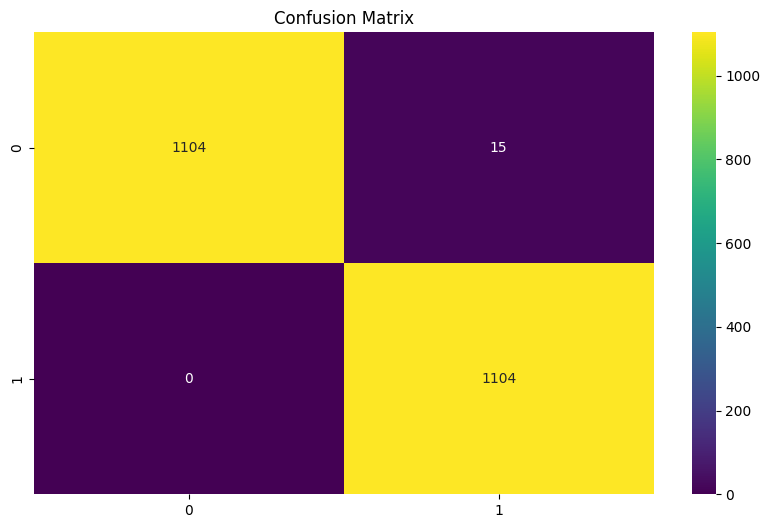

In [32]:
cm = confusion_matrix(y_test, preds)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="viridis")
plt.title("Confusion Matrix")
plt.show()

<h2 style="color: #2E86C1; font-size: 2.5em; font-weight: bold; text-align: center;">
    Save the Model
</h2>

In [33]:
import pickle

with open('models/heart_attack_detection_model_99.3%.pkl', 'wb') as file:
    pickle.dump(final_model, file)